<a href="https://colab.research.google.com/github/KOMPALALOKESH/Credit-card-fraud-detect/blob/main/credit_card_fraud_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit card fraud detection

* Suitable **machine-learning models** will be identified and developed for the system to detect and classify **fraudulent credit card transactions**.

* **Data visualization mechanisms** will be incorporated into the project, allowing for the exploration and understanding of the provided datasets. An interactive GUI software system will be created to facilitate user interaction and display the results of the fraud detection.

* The project will address all areas of business operations that can be determined from the dataset and the specific case scenario related to credit card fraud detection. This includes aspects such as **data analysis**, model training and evaluation, and **decision-making** based on the detected fraud patterns.

* **Data cleansing, pre-processing**, and **feature selection techniques** will be applied to the provided datasets to ensure the data is in a suitable format for training the machine-learning models. This involves removing **missing values**, **handling outliers, normalizing data,** and selecting relevant features.

* The selection of machine learning models and algorithms will be justified based on their suitability for credit card fraud detection. Different models such as **logistic regression, random forest**, or deep learning architectures like recurrent neural networks (RNNs) may be considered based on their performance and interpretability.

* The findings and solutions of the project will be presented in a **structured** and clear manner. This includes documenting the data exploration, data preprocessing steps, model selection and **justification, evaluation metrics**, and the **overall performance** of the credit card fraud detection system. Visualizations and summary **statistics** will be used to enhance the clarity of the presentation.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Importing Data

In [ ]:
df = pd.read_csv('credit_card_fraud_data.csv')
df.head()

,sl_no,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,1,57.877857,0.311140,1.945940,1,1,0,0,0
1,2,10.829943,0.175592,1.294219,1,0,0,0,0
2,3,5.091079,0.805153,0.427715,1,0,0,1,0
3,4,2.247564,5.600044,0.362663,1,1,0,1,0
4,5,44.190936,0.566486,2.222767,1,1,0,1,0


In [ ]:
df.describe()

,sl_no,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,26.374744,4.807107,1.824164,0.879000,0.350800,0.104800,0.641500,0.084100
std,2886.89568,58.811106,22.260124,2.762438,0.326144,0.477244,0.306311,0.479584,0.277552
min,1.00000,0.049270,0.000930,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,3.808606,0.305219,0.489052,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5000.50000,10.026888,1.006459,1.005754,1.000000,0.000000,0.000000,1.000000,0.000000
75%,7500.25000,25.866217,3.313696,2.091252,1.000000,1.000000,0.000000,1.000000,0.000000
max,10000.00000,2033.498174,990.070315,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
labels = ['L10','L50','L100','L500','L1000']
counts = [0 for i in range(5)]

for i in df['distance_from_home']:
  if i < 10:
    counts[0] += 1
  elif i < 50:
    counts[1] += 1
  elif i < 100:
    counts[2] += 1
  elif i < 500:
    counts[3] += 1
  else:
    counts[4] += 1

total = sum(counts)
counts = [round((i/total)*100,2) for i in counts]

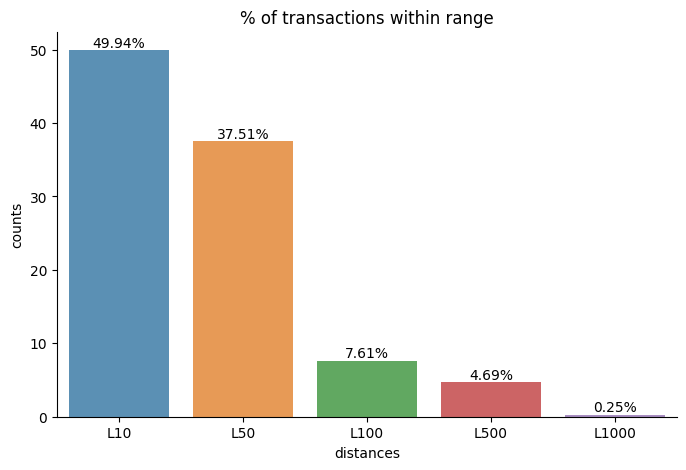

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x=labels, y=counts, alpha=0.8)
plt.xlabel('distances')
plt.ylabel('counts')
plt.title('% of transactions within range')

for i, v in enumerate(counts):
    ax.text(i, v, f'{v}%', ha='center', va='bottom')

sns.despine()
plt.show()

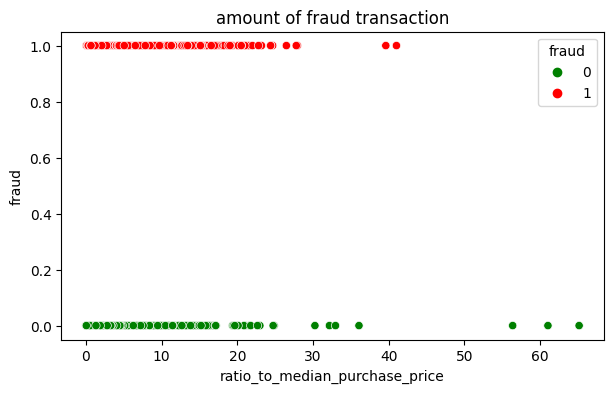

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x = 'ratio_to_median_purchase_price', y = 'fraud',  data = df, hue='fraud', palette=['green','red'])
plt.title('amount of fraud transaction')
plt.show()

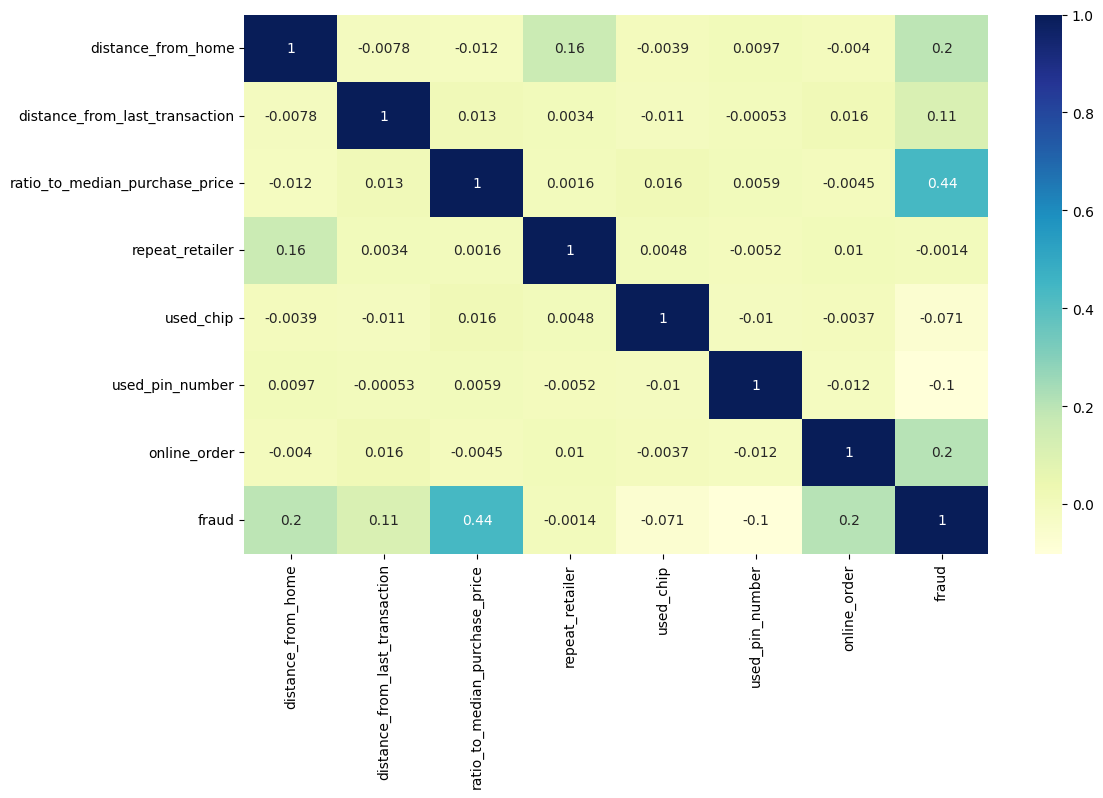

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.iloc[:, 1:].corr(), cmap="YlGnBu", annot=True)
plt.show()

## Splitting Data 

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Log classifier

In [ ]:
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict1 = classifier1.predict(X_test)
y_predict1_prob = classifier1.predict_proba(X_test)[:,1]

### Log classifier evaluation

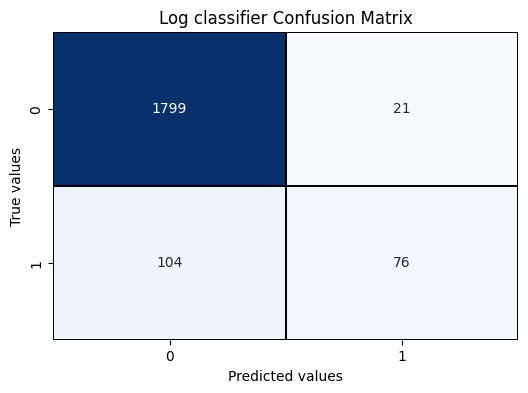

In [ ]:
cm1 = confusion_matrix(y_test, y_predict1)

plt.figure(figsize=(6,4))
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d', cbar=False, linewidths=0.01, linecolor='black')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Log classifier Confusion Matrix')
plt.show()

In [ ]:
#Performance metrics evaluation
print("Accuracy: ",metrics.accuracy_score(y_test,y_predict1))
print("Precision: ",metrics.precision_score(y_test,y_predict1))
print("Recall: ",metrics.recall_score(y_test,y_predict1))
print("AUC: ",metrics.roc_auc_score(y_test,y_predict1_prob))
auc=metrics.roc_auc_score(y_test,y_predict1_prob)

Accuracy:  0.9375
Precision:  0.7835051546391752
Recall:  0.4222222222222222
AUC:  0.9578479853479853


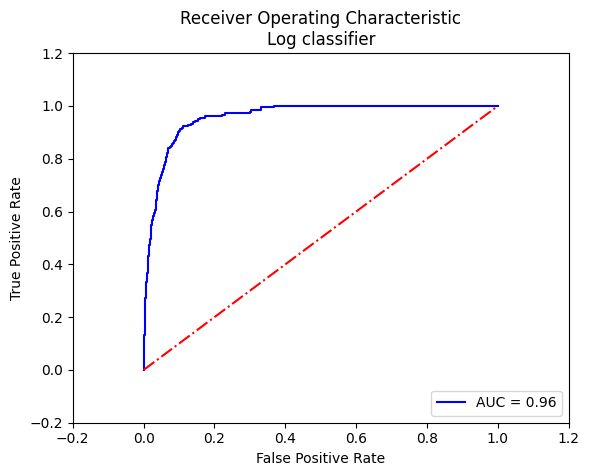

In [ ]:
#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predict1_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLog classifier')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## K Neighbors classifier

In [ ]:
classifier2 = KNeighborsClassifier()
classifier2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_predict2 = classifier2.predict(X_test)
y_predict2_prob = classifier2.predict_proba(X_test)[:,1]

### K Neighbors classifier evaluation

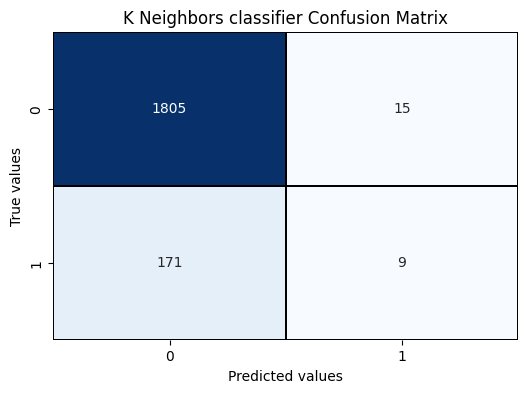

In [ ]:
cm2 = confusion_matrix(y_test, y_predict2)

plt.figure(figsize=(6,4))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='d', cbar=False, linewidths=0.01, linecolor='black')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('K Neighbors classifier Confusion Matrix')
plt.show()

In [ ]:
#Performance metrics evaluation
print("Accuracy: ",metrics.accuracy_score(y_test,y_predict2))
print("Precision: ",metrics.precision_score(y_test,y_predict2))
print("Recall: ",metrics.recall_score(y_test,y_predict2))
print("AUC: ",metrics.roc_auc_score(y_test,y_predict2_prob))
auc=metrics.roc_auc_score(y_test,y_predict2_prob)

Accuracy:  0.907
Precision:  0.375
Recall:  0.05
AUC:  0.6238217338217339


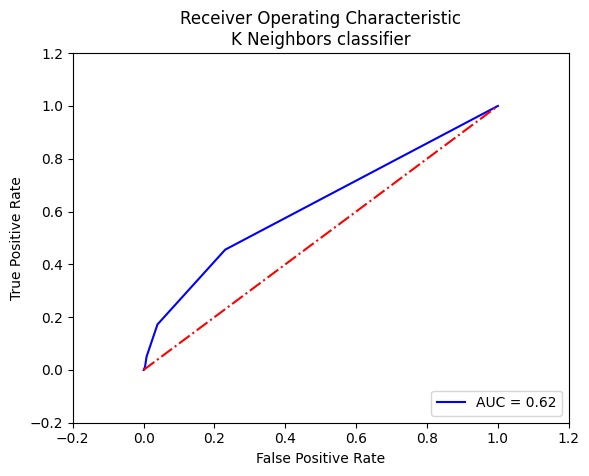

In [ ]:
#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predict2_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nK Neighbors classifier')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Naive Bayes classifier

In [ ]:
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_predict3 = classifier3.predict(X_test)
y_predict3_prob = classifier3.predict_proba(X_test)[:,1]

### Naive Bayes classifier evaluation

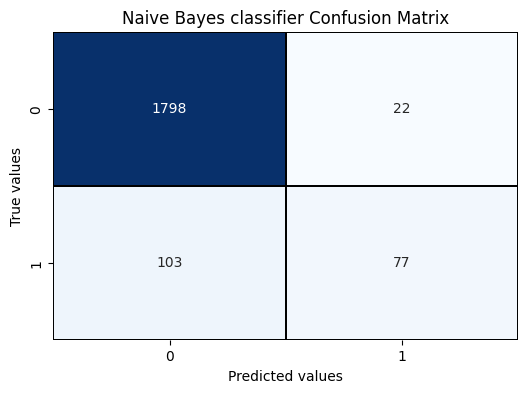

In [ ]:
cm3 = confusion_matrix(y_test, y_predict3)

plt.figure(figsize=(6,4))
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='d', cbar=False, linewidths=0.01, linecolor='black')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Naive Bayes classifier Confusion Matrix')
plt.show()

In [ ]:
#Performance metrics evaluation
print("Accuracy: ",metrics.accuracy_score(y_test,y_predict3))
print("Precision: ",metrics.precision_score(y_test,y_predict3))
print("Recall: ",metrics.recall_score(y_test,y_predict3))
print("AUC: ",metrics.roc_auc_score(y_test,y_predict3_prob))
auc=metrics.roc_auc_score(y_test,y_predict3_prob)

Accuracy:  0.9375
Precision:  0.7777777777777778
Recall:  0.42777777777777776
AUC:  0.9667277167277167


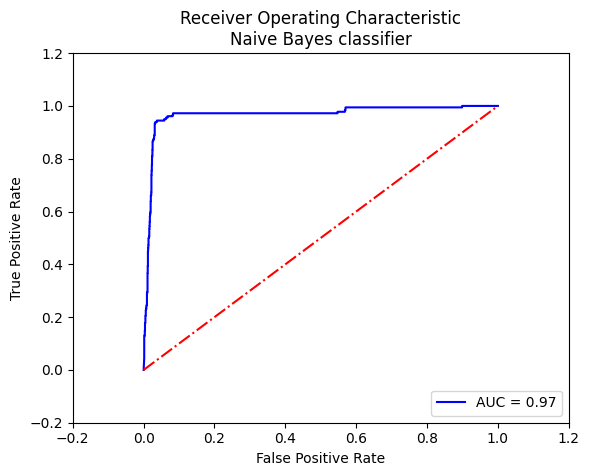

In [ ]:
#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predict3_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nNaive Bayes classifier')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree classifier

In [ ]:
classifier4 = DecisionTreeClassifier()
classifier4.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict4 = classifier4.predict(X_test)
y_predict4_prob = classifier4.predict_proba(X_test)[:,1]

### Decision Tree classifier evaluation

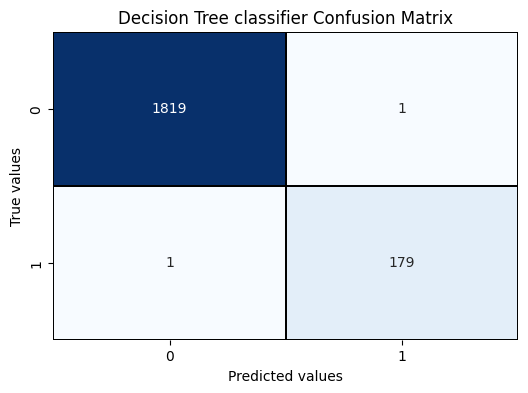

In [ ]:
cm4 = confusion_matrix(y_test, y_predict4)

plt.figure(figsize=(6,4))
sns.heatmap(cm4, annot=True, cmap='Blues', fmt='d', cbar=False, linewidths=0.01, linecolor='black')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Decision Tree classifier Confusion Matrix')
plt.show()

In [ ]:
#Performance metrics evaluation
print("Accuracy: ",metrics.accuracy_score(y_test,y_predict4))
print("Precision: ",metrics.precision_score(y_test,y_predict4))
print("Recall: ",metrics.recall_score(y_test,y_predict4))
print("AUC: ",metrics.roc_auc_score(y_test,y_predict4_prob))
auc=metrics.roc_auc_score(y_test,y_predict4_prob)

Accuracy:  0.999
Precision:  0.9944444444444445
Recall:  0.9944444444444445
AUC:  0.996947496947497


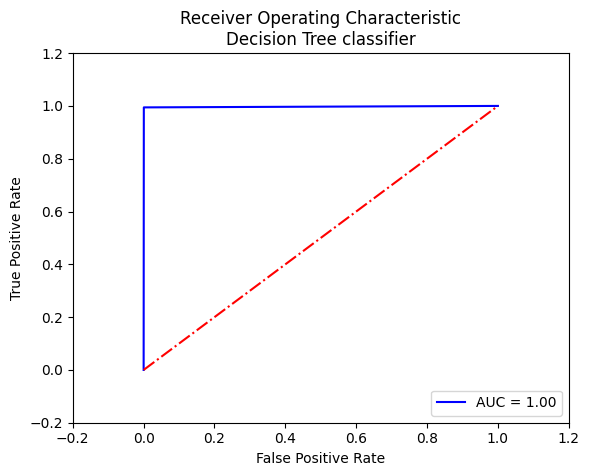

In [ ]:
#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predict4_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nDecision Tree classifier')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest classifier 

In [ ]:
classifier5 = RandomForestClassifier()
classifier5.fit(X_train, y_train)

<ipython-input-30-177f72924015>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier5.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_predict5 = classifier5.predict(X_test)
y_predict5_prob=classifier5.predict_proba(X_test)[:,1]

### Random Forest classifier evaluation

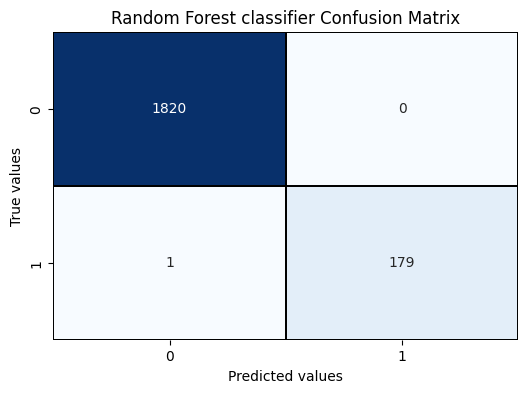

In [ ]:
cm5 = confusion_matrix(y_test, y_predict5)

plt.figure(figsize=(6,4))
sns.heatmap(cm5, annot=True, cmap='Blues', fmt='d', cbar=False, linewidths=0.01, linecolor='black')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Random Forest classifier Confusion Matrix')
plt.show()

In [ ]:
#Performance metrics evaluation
print("Accuracy: ",metrics.accuracy_score(y_test,y_predict5))
print("Precision: ",metrics.precision_score(y_test,y_predict5))
print("Recall: ",metrics.recall_score(y_test,y_predict5))
print("AUC: ",metrics.roc_auc_score(y_test,y_predict5_prob))
auc=metrics.roc_auc_score(y_test,y_predict5_prob)

Accuracy:  0.9995
Precision:  1.0
Recall:  0.9944444444444445
AUC:  0.9999725274725275


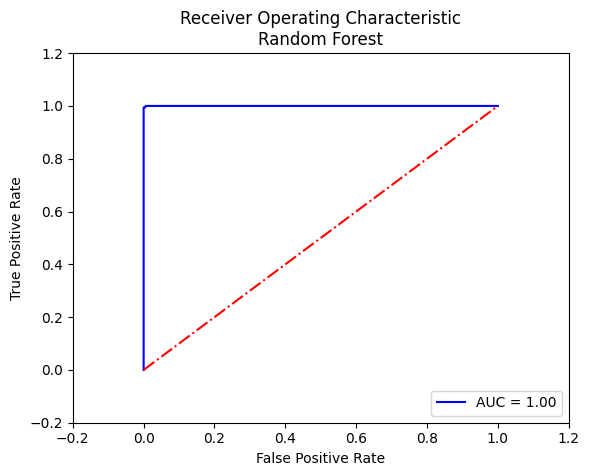

In [ ]:
#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_predict5_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()